<a href="https://colab.research.google.com/github/Zeenat85/Colab-Notebooks/blob/main/LAB_COMPONENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



By-Zeenat Amaan



# Determine depth map from Stereo pair

Importing the necessary libraries and modules

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Loading the stereo image

In [ ]:
imgL = cv2.imread('/content/L1.jpg',0)
imgR = cv2.imread('/content/R1.jpg',0)

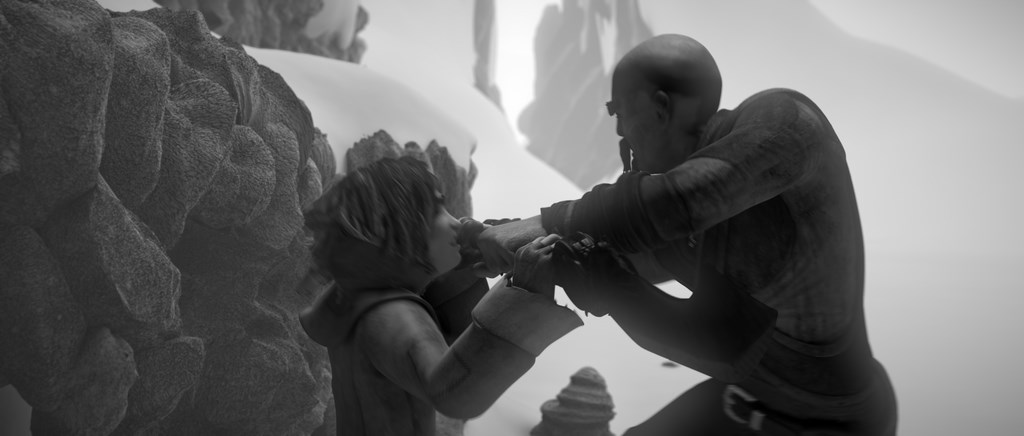

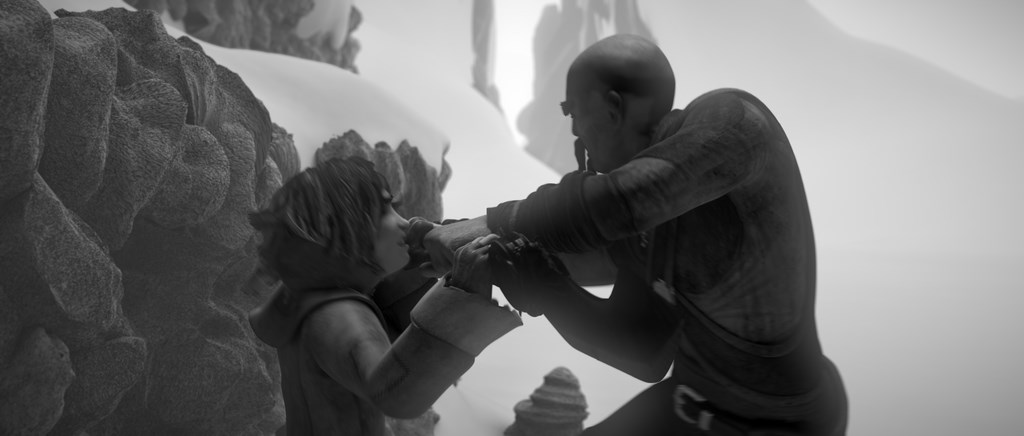

In [ ]:
cv2_imshow(imgL)

cv2_imshow(imgR)


Creating the depth map

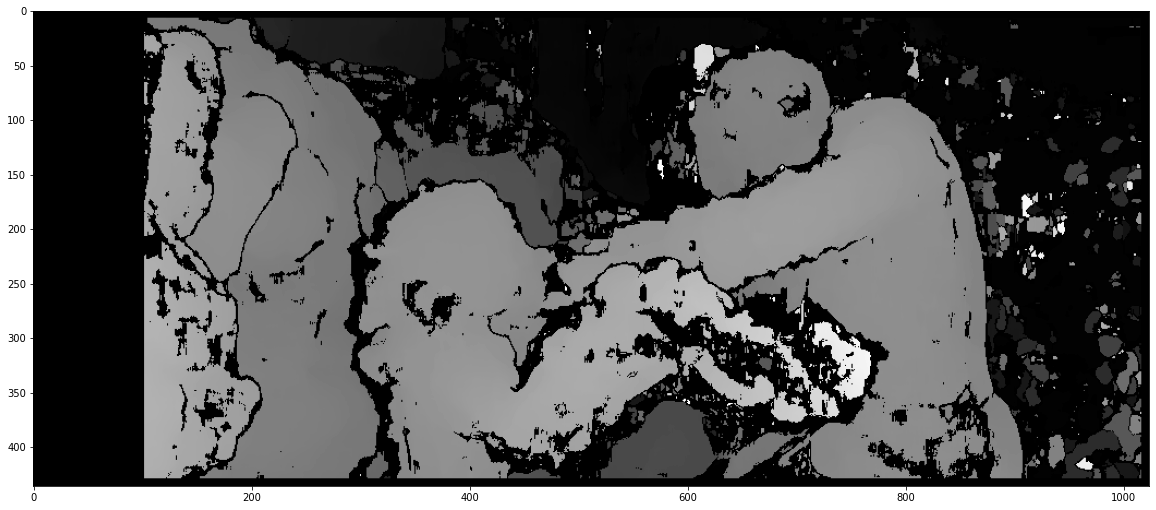

In [ ]:
 #creates StereoBm object
stereo = cv.StereoBM_create(numDisparities = 96,
                            blockSize = 15)

# computes disparity
disparity = stereo.compute(imgL, imgR)

# displays image as grayscale and plotted
plt.figure(figsize = (20,10))
plt.imshow(disparity, 'gray')
plt.show()

# Image Segmentation using K Means Clustering

Read in the image and convert it to an RGB image.

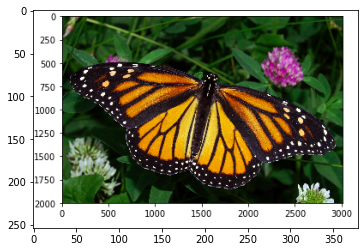

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('/content/images.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

Taking k = 3, which means that the algorithm will identify 3 clusters in the image.

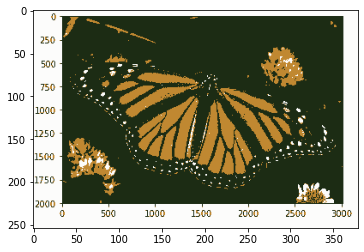

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)

Now if we change the value of k to 6, we get the following Output:

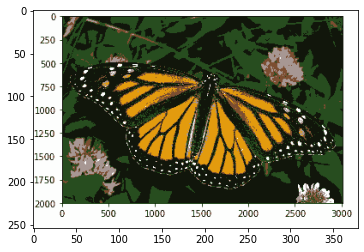

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)